# Predicting House Prices with ML Models

``Question``: Can we predict the sales prices of houses by implementing machine learning algorithms that study its features? 

``Objectives``: 
1. Predict the sale prices using features in the data using a Random Forest model 
2. Build Neural Network model and XGBoost model to achieve a lower error

``Data Source``: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

---

## Import and Setting

In [103]:
# Import 

# Warnings
import warnings
warnings.filterwarnings('ignore')
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Standard 
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Stats & ML
import statsmodels.api as sm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

In [41]:
# Set pandas row/column maximum
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

---

## Data

Try:
- Removing vs Keeping 'Id'
- Label encoder vs Ordinal encoder vs OneHot encoder

In [8]:
# Load train and test data
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [9]:
# Shape
print('Shape of train:', train.shape)
print('Shape of test:', test.shape)

train.head()

Shape of train: (1460, 81)
Shape of test: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## EDA

### Missing Values

In [11]:
# Count of missing values
train_null_counts = train.isnull().sum()
print("Train Dataset Count of Null Values:\n" ,train_null_counts[train_null_counts > 0].sort_values(ascending=False), sep="")

Train Dataset Count of Null Values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [15]:
# Check to see if -99s exist:
(train == -99).sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

3 options for handling missing values that we will experiment with:
1. Impute with -99 
2. Drop from data
3. Keep them

We deal with missing values in the later Data Transformation section.

### Exploration of Variables

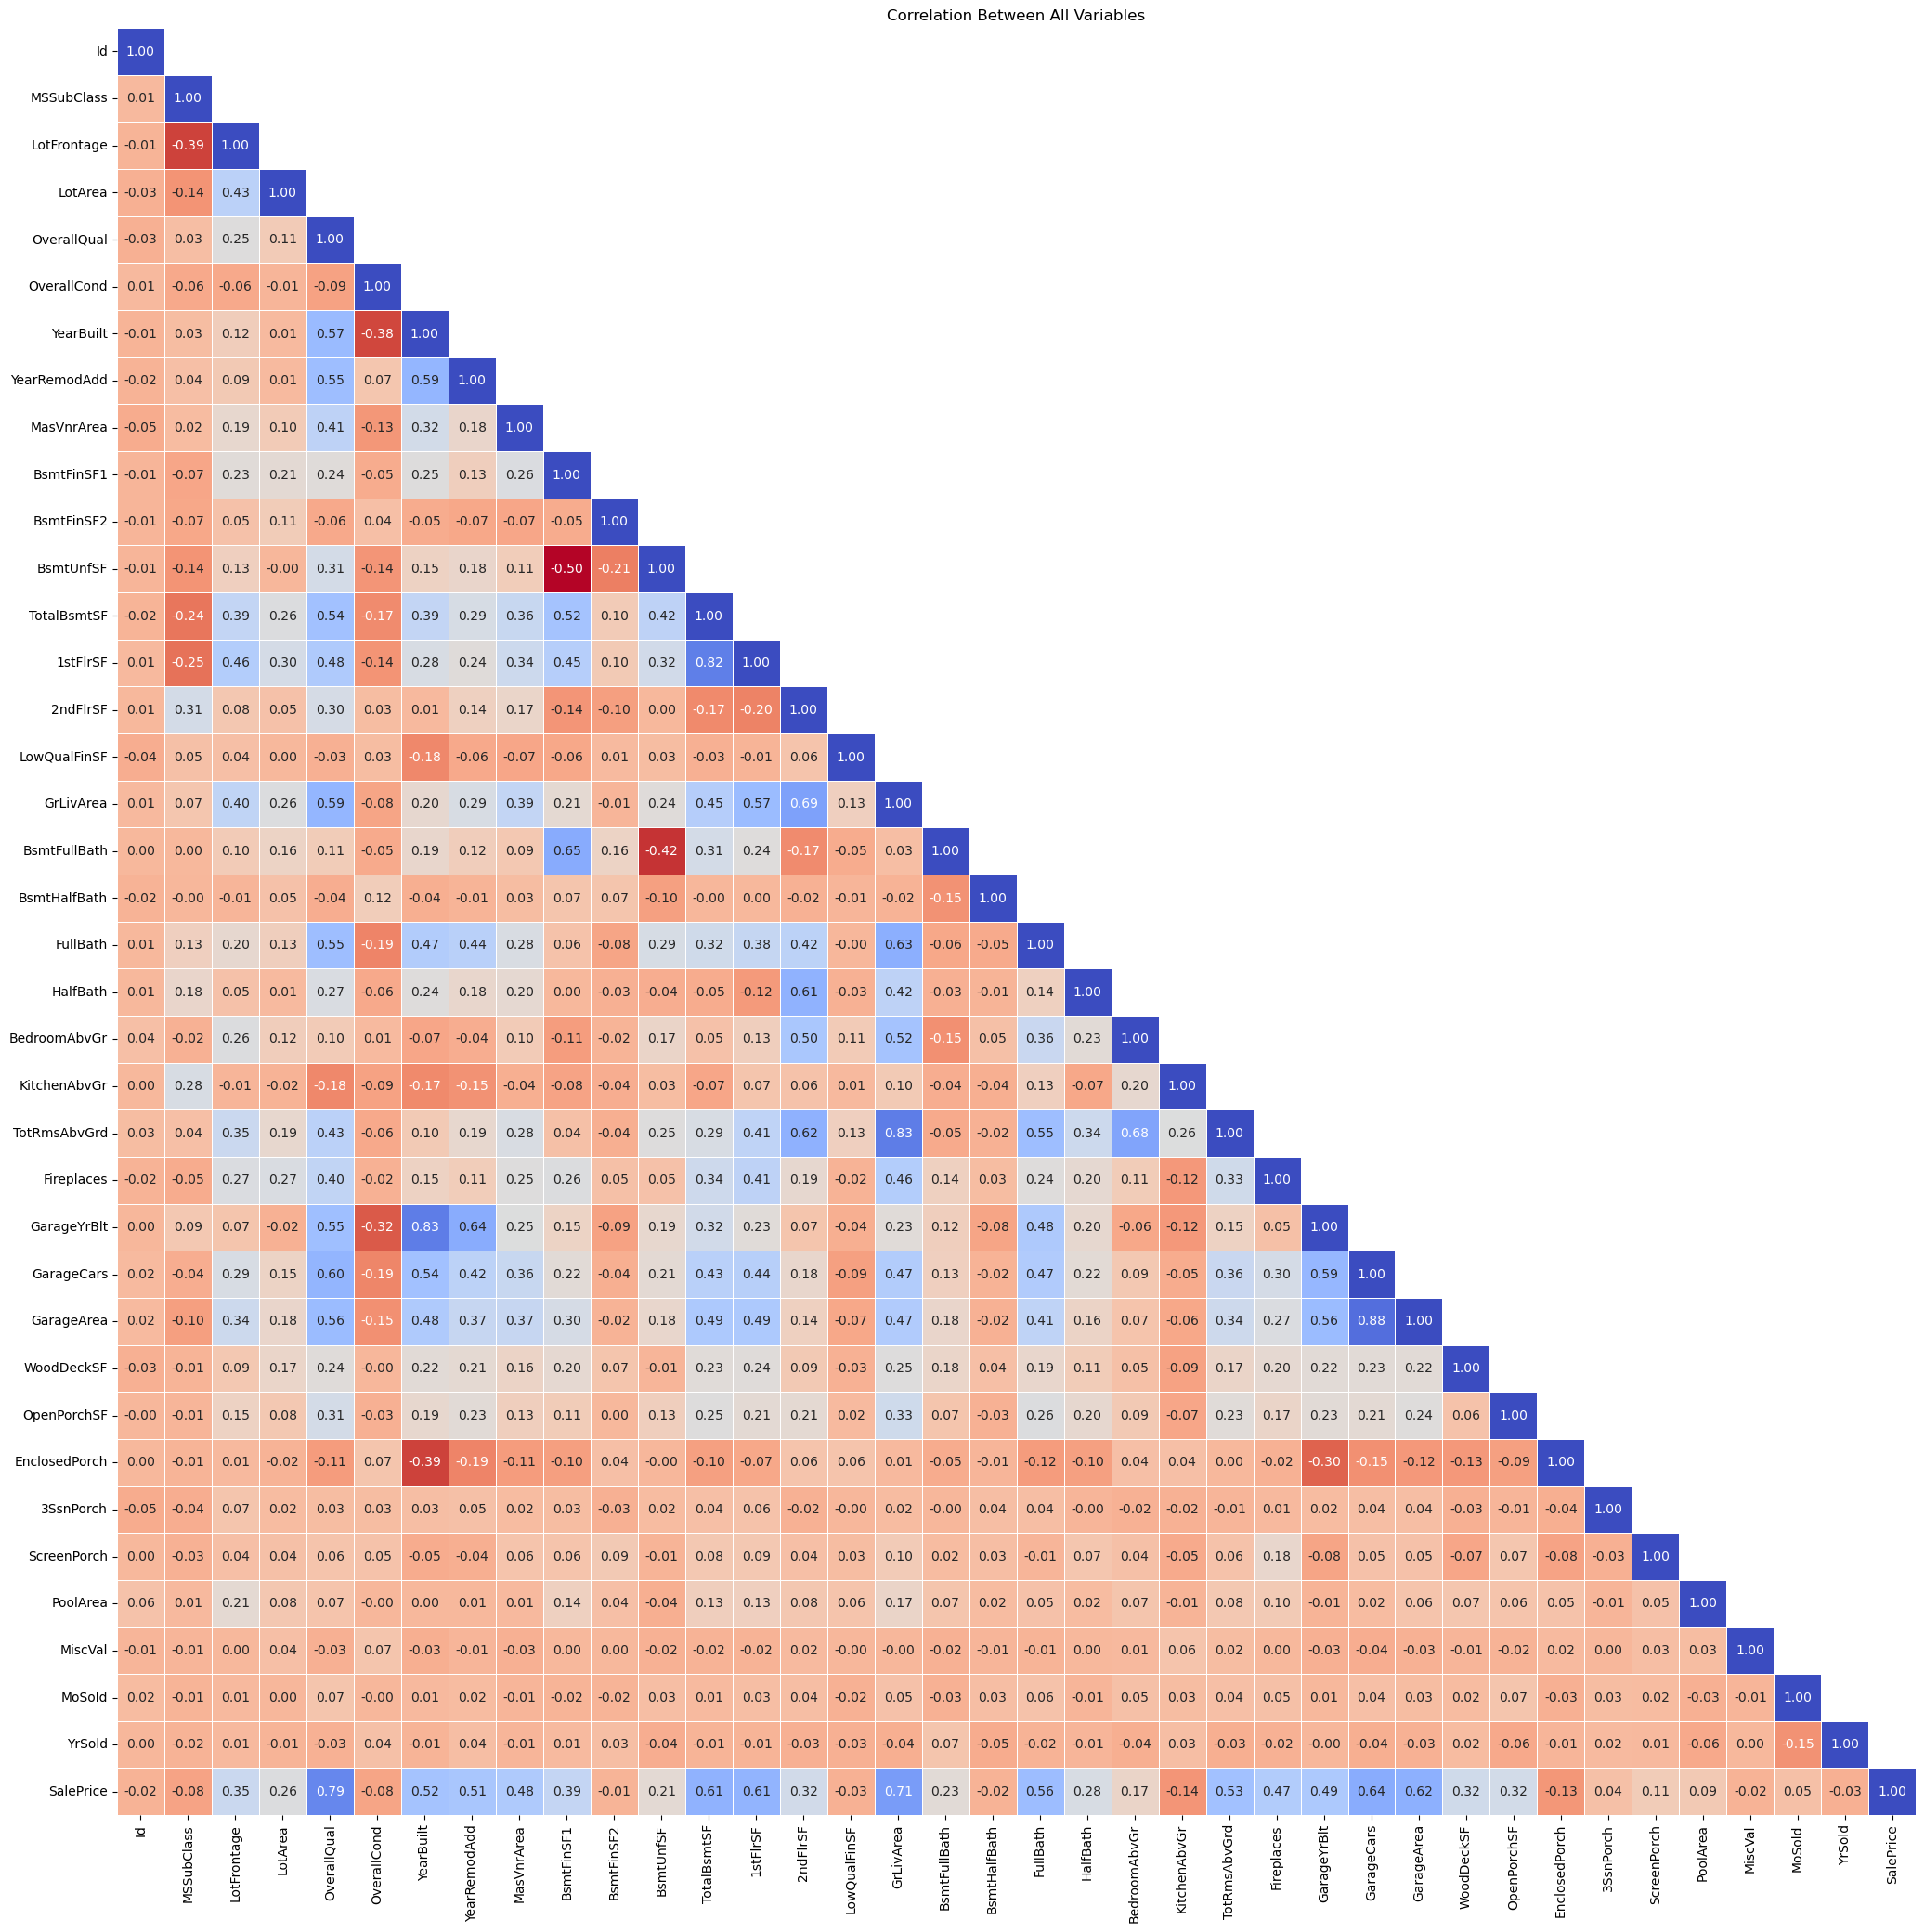

In [16]:
# Heatmap of all numeric variables
correlation_matrix = train.corr() 

lower_triangle = np.tril(correlation_matrix)
mask = np.where(lower_triangle == 0, True, False)

plt.figure(figsize=(25, 25))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap = sns.color_palette('coolwarm_r', as_cmap=True),
    fmt='.2f',
    linewidths=0.5,
    cbar=False,
    mask=mask
).set_title('Correlation Between All Variables')
plt.show()

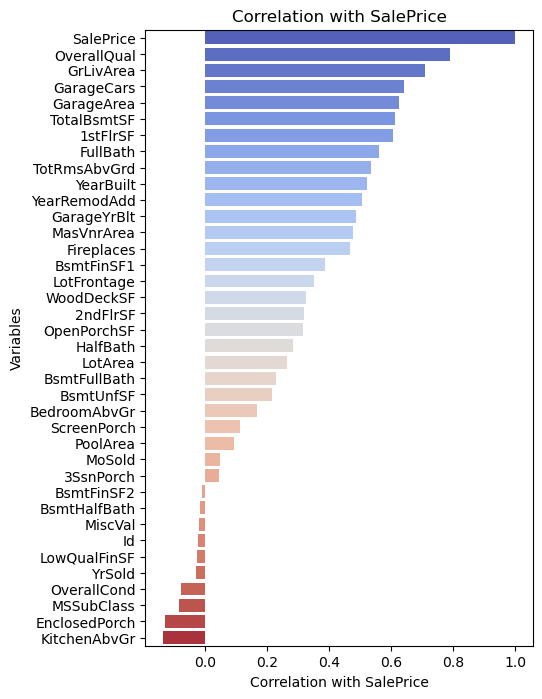

In [17]:
# Correlations with SalePrice
sale_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)

plt.figure(figsize=(5,8))
sns.barplot(
    y=sale_corr.index, 
    x=sale_corr, 
    orient='h',
    palette='coolwarm'
)
plt.title('Correlation with SalePrice')
plt.xlabel('Correlation with SalePrice')
plt.ylabel('Variables')
plt.show()

`OverallQual` seems to be the most impactful variable for predicting `SalePrice`. Running a simple OLS regression can provide us with a baseline number for `SalePrice`. But for our purposes, we will not use this for our baseline. 

In [18]:
# OLS regression 
Y = train['SalePrice']
X = train['OverallQual']
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2437.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          2.19e-313
Time:                        23:36:52   Log-Likelihood:                -17827.
No. Observations:                1460   AIC:                         3.566e+04
Df Residuals:                    1458   BIC:                         3.567e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.621e+04   5756.407    -16.713      

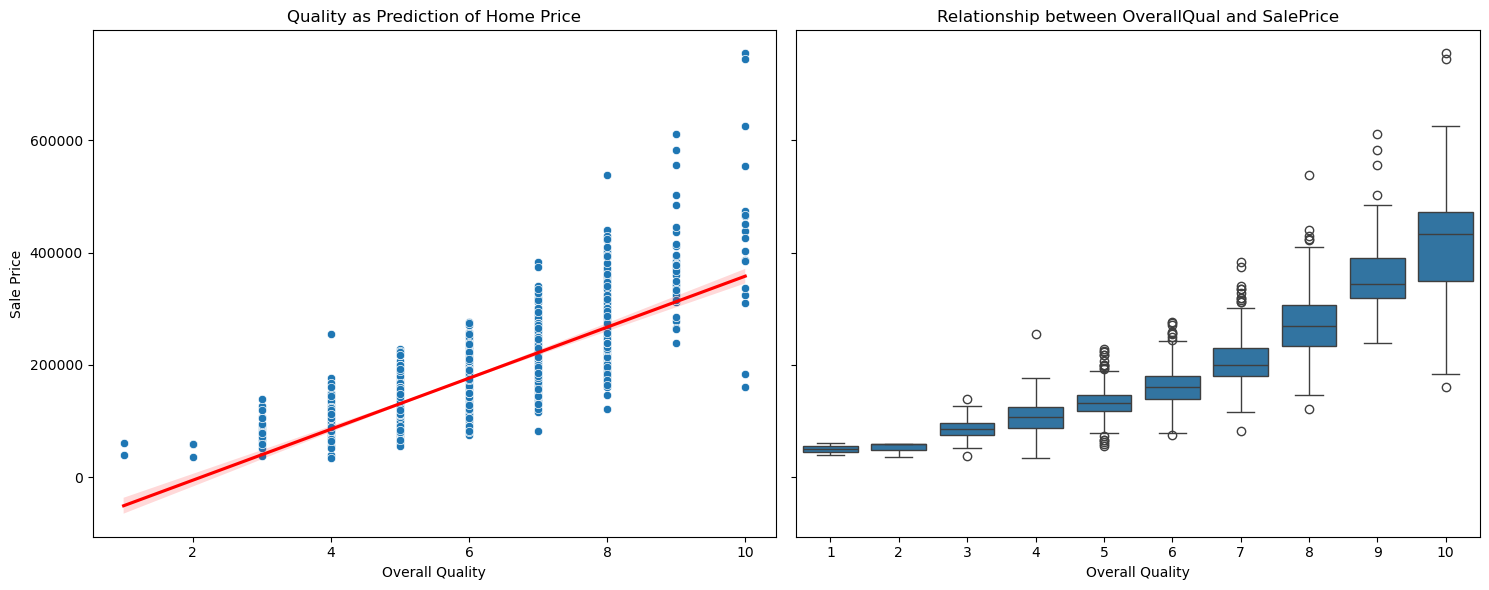

In [20]:
# OverallQual vs SalePrice
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

sns.scatterplot(x=X['OverallQual'], y=Y, ax=axs[0])
sns.regplot(x=X['OverallQual'], y=Y, color='red', scatter=False, ci=95, ax=axs[0])
axs[0].set_title('Quality as Prediction of Home Price')
axs[0].set_xlabel('Overall Quality')
axs[0].set_ylabel('Sale Price')

sns.boxplot(x=train['OverallQual'], y=train['SalePrice'], ax=axs[1])
axs[1].set_title('Relationship between OverallQual and SalePrice')
axs[1].set_xlabel('Overall Quality')

plt.tight_layout()
plt.show()

Understanding temporal elements can also be important for context, though the model will handle it on its own.

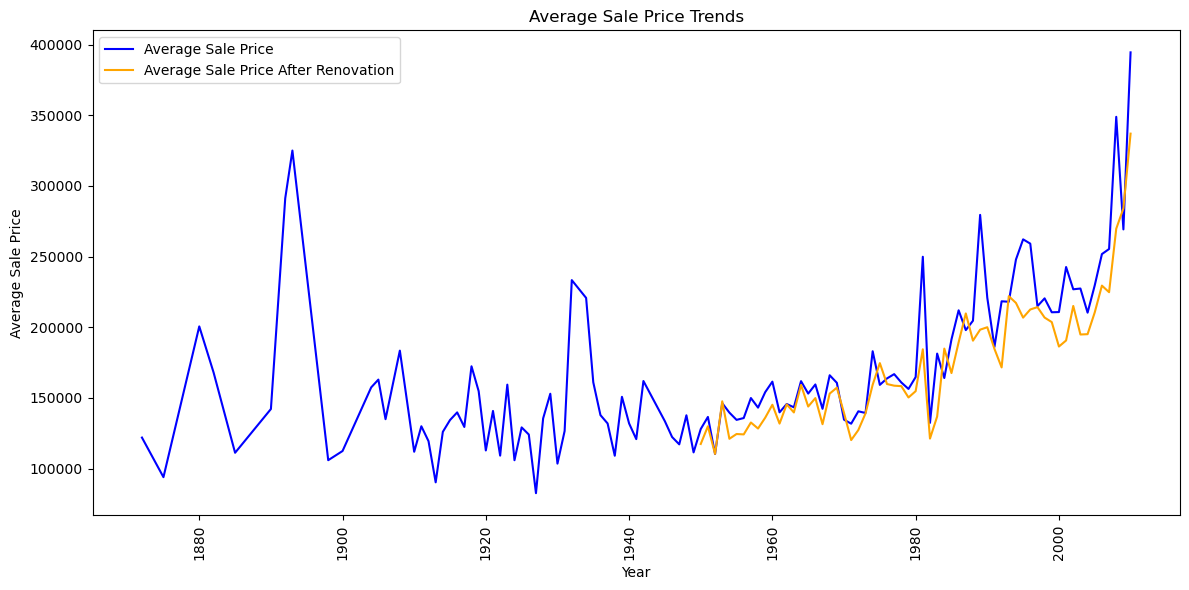

In [24]:
# YearBuilt and Year RemodAdd vs SalePrice

# Group data by YearBuilt and calculate the mean sale price for each year
average_sale_price_by_year = train.groupby('YearBuilt')['SalePrice'].mean()

# Group data by YearRemodAdd and calculate the mean sale price for each year
average_sale_price_after_renovation = train.groupby('YearRemodAdd')['SalePrice'].mean()

# Plot
plt.figure(figsize=(12, 6))

average_sale_price_by_year.plot(label='Average Sale Price', color='blue')
average_sale_price_after_renovation.plot(label='Average Sale Price After Renovation', color='orange')

average_sale_price_by_year.plot(ax=axs[0], color='blue')
axs[0].set_title('Average Sale Price')
axs[0].set_ylabel('Average Sale Price')

average_sale_price_after_renovation.plot(ax=axs[1], color='orange')
axs[1].set_title('Average Sale Price After Renovation')
axs[1].set_ylabel('Average Sale Price')
axs[1].set_xlabel('Year')

plt.title('Average Sale Price Trends')
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

## Data Transformations

We compile all data cleanining that we have experimented with as a function below. We can toggle some parts on and off by commenting out certain parts of this function:

In [84]:
def data_cleaning(df):
    """
    Combines all cleaning/transformation and feature engineering into a single function
    Takes input dataset and returns a transformed dataset

    Toggle certain parts of the code with comments
    """

    # # Drop Id variable (for Kaggle submission, remember to append Id back with test dataset)
    # df = df.drop('Id', axis=1)

    # Missing Values (Choose how to deal with missing values)
    # Fill NAs with -99 
    df = df.fillna(-99)

    # # Drop rows with NAs
    # df = df.dropna(how='any', axis=0)
    # df = df.reset_index(drop=True)
    
    # # Drop columns with many NAs
    # df = df.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)


    # Feature Engineering (Choose LabelEncoder OR OrdinalEncoder & OneHotEncoder)
    # LabelEncoder
    label_encoder = LabelEncoder()
    label_df = pd.DataFrame()

    for col in non_numeric_cols:
        if df[col].apply(lambda x: isinstance(x, (int, float))).any():  # Check if there are any numeric values
            df[col] = df[col].astype(str)  # Convert to string if there are numeric values

        label_encoded = label_encoder.fit_transform(df[col])
        label_df[col] = label_encoded

    df = df.drop(columns=non_numeric_cols)
    df = pd.concat([df, label_df], axis=1)

    # # OrdinalEncoder
    # ordinal_encoder = OrdinalEncoder()
    # ordinal_encoded = ordinal_encoder.fit_transform(df[ordinal_cols])
    # ordinal_df = pd.DataFrame(ordinal_encoded, columns=ordinal_encoder.get_feature_names_out(ordinal_cols))

    # df = df.drop(columns=ordinal_cols)
    # df = pd.concat([df, ordinal_df], axis=1)

    # # OneHotEncoder
    # one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    # one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_cols])
    # one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

    # df = df.drop(columns=categorical_cols)
    # df = pd.concat([df, one_hot_df], axis=1)

    return df

In [48]:
# Categorizing non-numerical column types

# Non-numerical columns for LabelEncoder
non_numeric_cols = train.columns[train.dtypes == 'object']

# Ordinal columns for OrdinalEncoder
ordinal_vars = [
    'OverallQual', 'OverallCond',
    'ExterQual', 'ExterCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'LandSlope',
    'HeatingQC',
    'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
    'TotRmsAbvGrd', 
    'FireplaceQu',
    'GarageQual', 'GarageCond',
    'PoolQC',
    'SaleType', 'SaleCondition'
]

# Categorical columns for OneHotEncoder
categorical_vars = [
    'MSSubClass', 'MSZoning',
    'Street', 
    'Alley',
    'LotShape', 'LandContour', 
    'Utilities', 
    'LotConfig',
    'Neighborhood', 
    'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'Foundation',
    'BsmtFinType1', 'BsmtFinType2',
    'Heating', 'CentralAir', 'Electrical',
    'Functional',
    'GarageType', 'GarageFinish', 'PavedDrive',
    'Fence', 'MiscFeature'
]

In [53]:
# Run data_cleaning function
train = data_cleaning(train)
test = data_cleaning(test)

print('Shape of train after cleaning and feature engineering:', train.shape)
print('Shape of test after cleaning and feature engineering:', test.shape)

train.head()

Shape of train after cleaning and feature engineering: (1460, 81)
Shape of test after cleaning and feature engineering: (1459, 80)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,3,1,0,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,2,4,2,3,4,4,3,6,1,0,1,5,2,6,0,2,2,5,5,2,0,0,0,8,4
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,3,1,0,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,3,4,1,3,4,2,1,6,1,0,1,5,3,6,5,2,2,5,5,2,0,0,0,8,4
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,3,1,0,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,2,4,2,3,4,3,3,6,1,0,1,5,2,6,5,2,2,5,5,2,0,0,0,8,4
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,3,1,0,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,3,4,0,4,2,4,1,6,1,2,1,5,2,6,3,6,3,5,5,2,0,0,0,8,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,3,1,0,0,3,0,2,0,15,2,2,0,5,1,1,12,13,2,2,4,2,3,4,1,3,6,1,0,1,5,2,6,5,2,2,5,5,2,0,0,0,8,4


## Train, Validation, Test

In [79]:
# Train and validation data

# # Set seed
# random_state = 0

# Split size
train_val_split_size = 0.15

# Split shuffled training data into training and validation
X_train, X_val, y_train, y_val = train_test_split(
    train.drop(axis=1, labels=['SalePrice']), train['SalePrice'], 
    test_size=train_val_split_size,
    shuffle=True, 
    random_state=random_state
)

# Shapes
print("X_train shape:", X_train.shape)
print("Y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", y_val.shape)

X_train shape: (1241, 80)
Y_train shape: (1241,)
X_val shape: (219, 80)
Y_val shape: (219,)


In [57]:
# Test data
X_test = test # No change to the test dataset

print("X_test shape:", X_test.shape)


X_test shape: (1459, 80)


---

## Modeling & Evaluation

### Random Forest (Baseline)

In [80]:
# Random Forest model
rf = RandomForestRegressor(n_estimators=30)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [81]:
# Random Forest Score on Val
print('Random Forest Model Score:', rf.score(X_val, y_val))

Random Forest Model Score: 0.872595523246064


In [82]:
# Predictions 
predictions = rf.predict(X_val)
print('Sample predictions:\n', np.round(predictions[0:5], decimals=2))

Sample predictions:
 [210476.67 143290.   106623.33 227239.67  93843.33]


In [83]:
# MSE
mse = mean_squared_error(y_val, predictions)
print('Mean Squared Error on Validation Set:', mse)

# MAE
mae = mean_absolute_error(y_val, predictions)
print('Mean Absolute Error on Validation Set:', mae)

Mean Squared Error on Validation Set: 783016442.1167834
Mean Absolute Error on Validation Set: 15895.514459665144


### Neural Network

In [85]:
def train_nn():
    """
    Neural Network model using Tensorflow/Keras 
    """
    # Clear session
    tf.keras.backend.clear_session() 

    # Model layers
    model = tf.keras.Sequential() 

    model.add(tf.keras.layers.Dense(
        units=25,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dropout(0.05))

    model.add(tf.keras.layers.Dense(
        units=20,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dropout(0.01))

    model.add(tf.keras.layers.Dense(
        units=10,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dropout(0.01))

    model.add(tf.keras.layers.Dense(
        units=5,
        activation='relu'
    ))
    model.add(tf.keras.layers.Dropout(0.01))
    
    model.add(tf.keras.layers.Dense(
        units=3,
        activation='relu'
    ))    
    
    # Compile 
    model.compile(loss='MSE', 
            optimizer='Adam', 
            metrics=['MAE',"MAPE"])

    return model

In [91]:
# Neural Network model
nn = train_nn()

history = nn.fit(
    x=X_train,
    y=y_train,
    epochs=1000,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/1000


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - MAE: 180031.1562 - MAPE: 99.9722 - loss: 38986211328.0000 - val_MAE: 178985.3906 - val_MAPE: 99.8996 - val_loss: 37809414144.0000
Epoch 2/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MAE: 180299.0312 - MAPE: 99.8281 - loss: 38834450432.0000 - val_MAE: 178327.0469 - val_MAPE: 99.4938 - val_loss: 37562744832.0000
Epoch 3/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MAE: 181616.9844 - MAPE: 99.2602 - loss: 39201017856.0000 - val_MAE: 176552.6406 - val_MAPE: 98.4016 - val_loss: 36909465600.0000
Epoch 4/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - MAE: 179582.4062 - MAPE: 97.8349 - loss: 38527500288.0000 - val_MAE: 172409.3125 - val_MAPE: 95.8535 - val_loss: 35459166208.0000
Epoch 5/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 171266.1562 - MAPE: 94.6520 - loss: 34998964224.0000 - val_MAE: 163786.6250 - val_MAPE: 90.5580 - val_loss: 32787144704.0000
Epoch 6/1000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - MAE: 160142.0469 - MAPE: 88.1365 - loss

In [99]:
# Last epoch MAE
print('Mean Absolute Error on Validation Set:', history.history['val_MAE'][len(history.history['loss']) - 1])

Mean Absolute Error on Validation Set: 19904.806640625


In [87]:
def show_history(history):
  plt.plot(history.history['loss'], color='black', label='train')
  plt.plot(history.history['val_loss'], color='red', label='val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

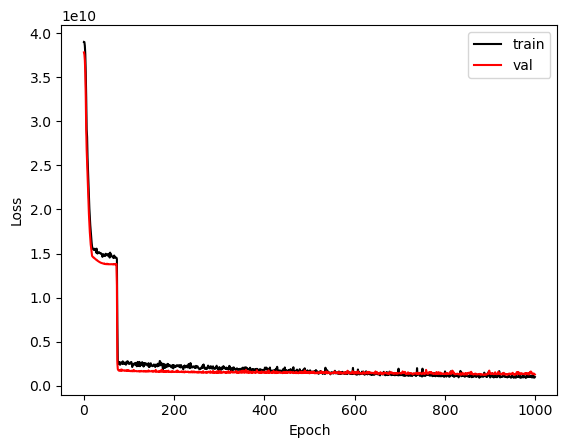

In [92]:
# Plot history
show_history(history)

### XGBoost

In [104]:
# XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [105]:
# XGBoost score
print('XGBoost Model Score:', xgb_model.score(X_val, y_val))

XGBoost Model Score: 0.8765170906534476


In [106]:
# Predictions
predictions = xgb_model.predict(X_val)
print('Sample predictions:\n', np.round(predictions[0:5], decimals=2))

Sample predictions:
 [249128.05 161744.64 102493.79 216481.78  95132.49]


In [107]:
# MSE
mse = mean_squared_error(y_val, predictions)
print('Mean Squared Error on Validation Set:', mse)

# MAE
mae = mean_absolute_error(y_val, predictions)
print('Mean Absolute Error on Validation Set:', mae)

Mean Squared Error on Validation Set: 758914841.944749
Mean Absolute Error on Validation Set: 18053.85939283676
